In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
# train, test 결과 불러오기
# iTransformer, test 결과 불러오기

result_path = './results/'
# cases four
# iTransformer (6:2:2)
# iTransformer with 0.5 trend + .5 linear
# iTransformer with .1 seasonal

dlinear_result = 'long_term_forecast_Exchange_96_96_dlinear_m101_Mod-DLinear_decomp_data-exchange_rate.csv_(96to96)_0(1726891565)'
dlinear_result2 = 'long_term_forecast_Exchange_96_96_dlinear_m101_Mod-DLinear_decomp_data-exchange_rate.csv_(96to96)_0(1726891701)'

obj_list = ['pred.npy', 'true.npy']
np_pred = np.load(result_path + dlinear_result + '/' + obj_list[0]) 
np_true = np.load(result_path + dlinear_result + '/' + obj_list[1]) 
np_pred2 = np.load(result_path + dlinear_result2 + '/' + obj_list[0]) 
np_true2 = np.load(result_path + dlinear_result2 + '/' + obj_list[1]) 

In [3]:
from utils.metrics import *

In [4]:
MSE(np_pred, np_pred2), MSE(np_true, np_true2)

(0.0, 0.0)

In [5]:
MSE(np_pred, np_true)

0.079201445

In [6]:
REC_CORR(np_pred, np_true)

0.11541500054990222

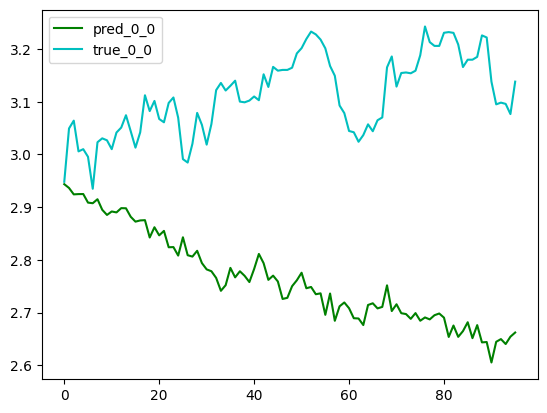

MSE
0.14252496
MAE
0.34852943
SMAE
0.34852943
REC_CORR
-0.6475707354190479
STD_RATIO
0.85345274
SLOPE_RATIO
0.45386441039832076


In [10]:
idx = 0
val = 0
tv = range(96)
# subplot

plt.plot(tv, np_pred[idx, :, val],'g', label=f'pred_{idx}_{val}' )
plt.plot(tv, np_true[idx, :, val],'c', label=f'true_{idx}_{val}' )
plt.legend()
plt.show()

print("MSE")
print(MSE(np_pred[idx, :, val], np_true[idx, :, val]))
print("MAE")
print(MAE(np_pred[idx, :, val], np_true[idx, :, val]))
print("SMAE")
print(SMAE(np_pred[idx, :, val], np_true[idx, :, val]))
print("REC_CORR")
print(np.corrcoef(np_pred[idx, :, val], np_true[idx, :, val])[0,1])
print("STD_RATIO")
print(np.std(np_true[idx, :, val])/np.std(np_pred[idx, :, val]))
print("SLOPE_RATIO")
print(len(tv)* (get_slope(np.array(tv), np_true[idx, :, val])-get_slope(np.array(tv), np_pred[idx, :, val])))

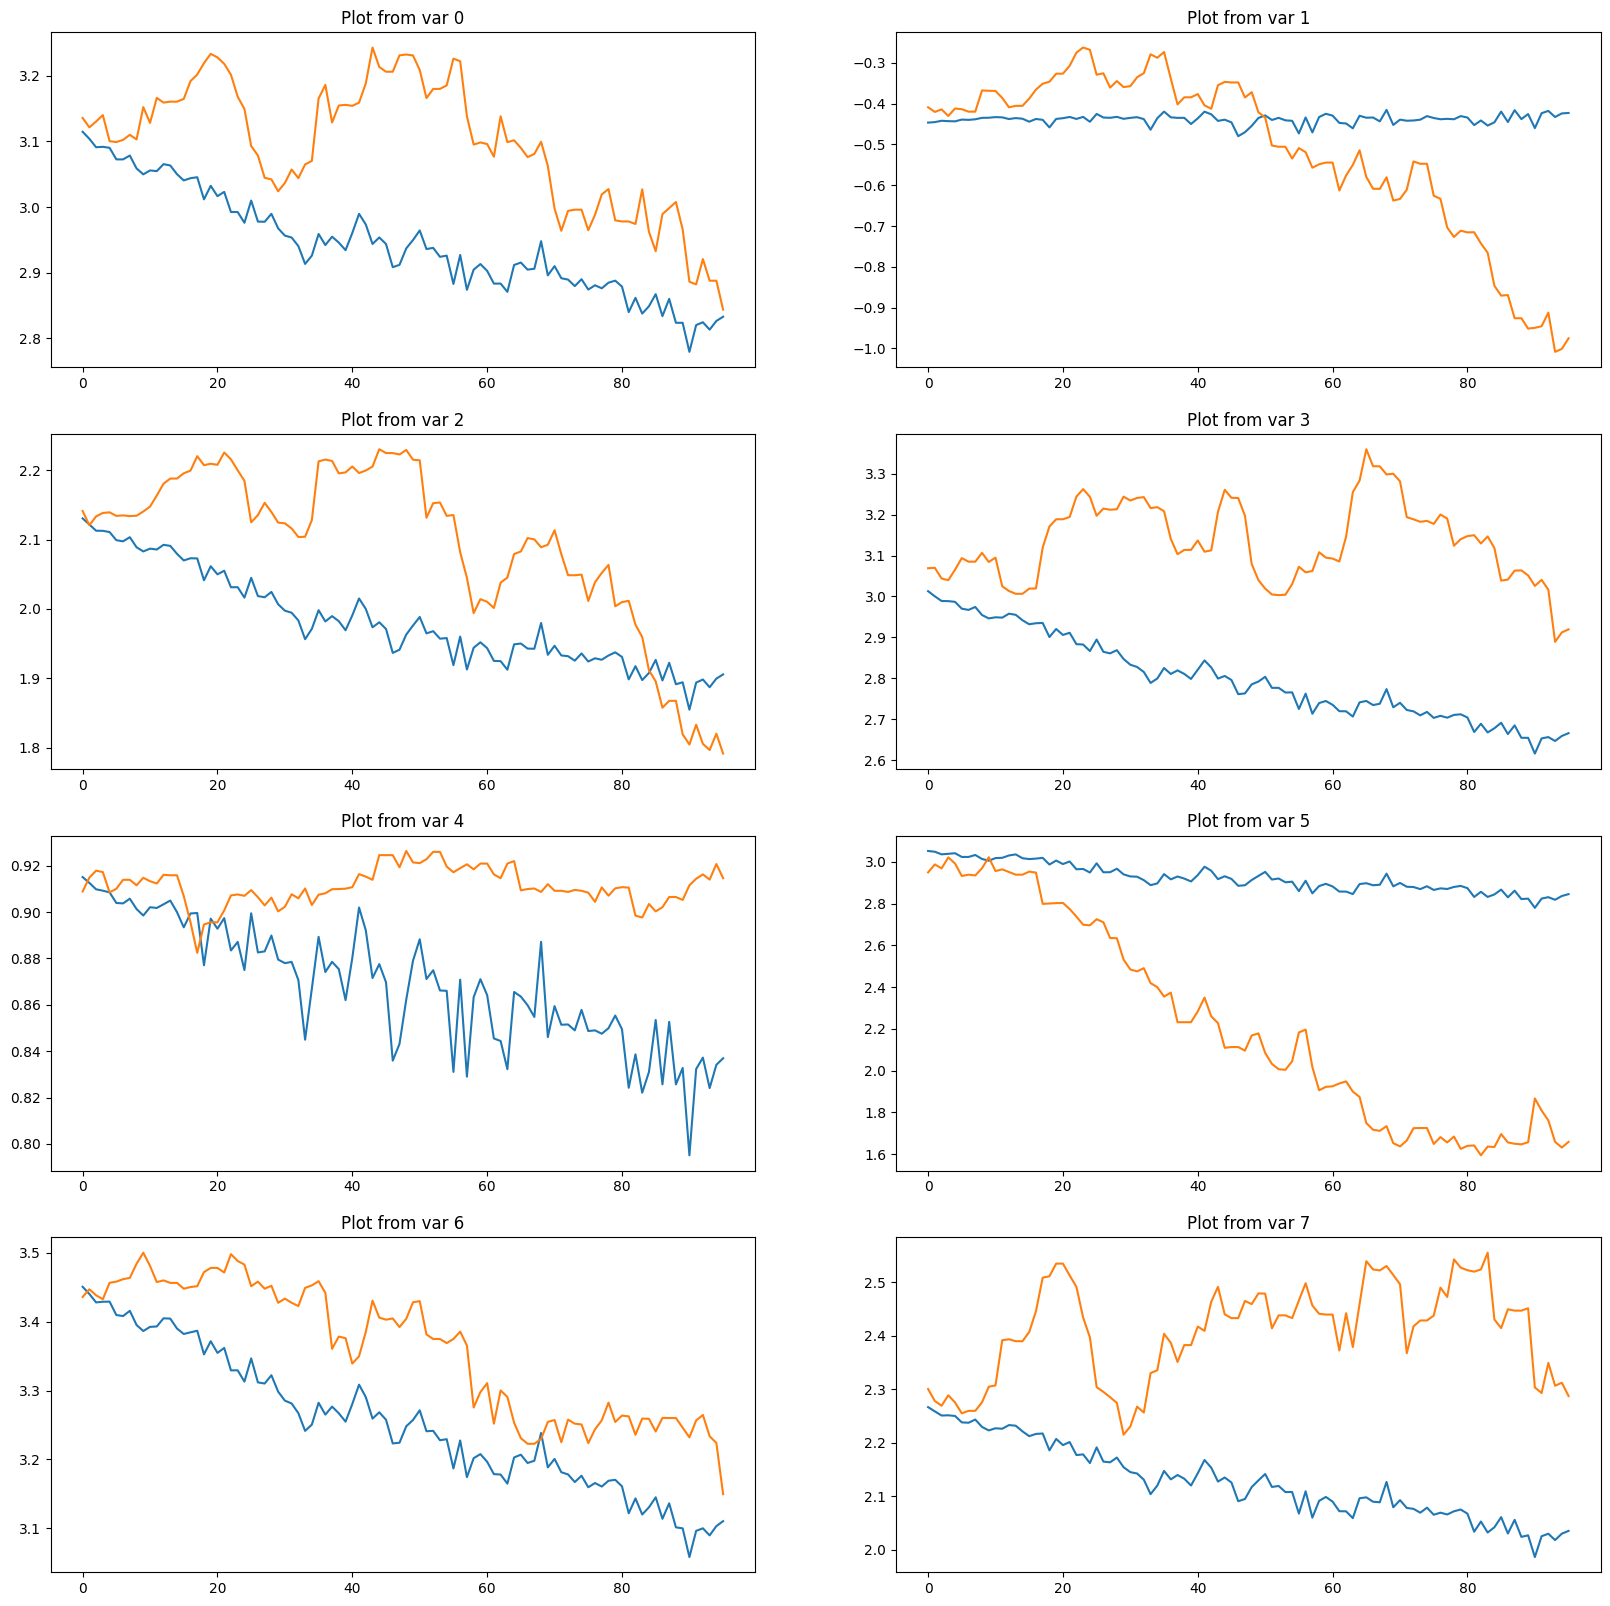

MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.028919375 0.15056938 0.15056938 0.614109030105702 1.2286569 0.03821782010182441
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.04656 0.15714361 -0.0768845 -0.17077186208175385 16.883549 -0.5928157652970313
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.020330735 0.1253316 0.1104759 0.6506166078763471 1.7342004 -0.08909349715780837
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.13061874 0.3317026 0.3317026 -0.021585127319306965 0.9350504 0.335700383965114
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.0026096506 0.043213118 0.042612504 -0.07389394769934678 0.29898226 0.08331971447945158
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.67316884 0.6992449 -0.6988979 0.910738666120426 7.345773 -1.4282327231543257
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.014115975 0.10739788 0.10690755 0.8610355567433388 0.9477489 0.03757038302739808
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.095078655 0.2797206 0.2797206

In [16]:
idx = 33
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = np_pred[idx, :, val]
        y2 = np_true[idx, :, val]
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용

plt.show()
for c in range(8):
    print("MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO")
    print(MSE(np_pred[idx,:,c], np_true[idx, :, c]), 
          MAE(np_pred[idx,:,c], np_true[idx, :, c]), 
          SMAE(np_pred[idx,:,c], np_true[idx, :, c]), 
          np.corrcoef(np_pred[idx,:,c], np_true[idx, :, c])[0,1], 
        np.std(np_true[idx,:,c]) / np.std(np_pred[idx, :, c]),
     96*(get_slope(tv, np_true[idx,:,c]) - get_slope(tv, np_pred[idx, :, c])))

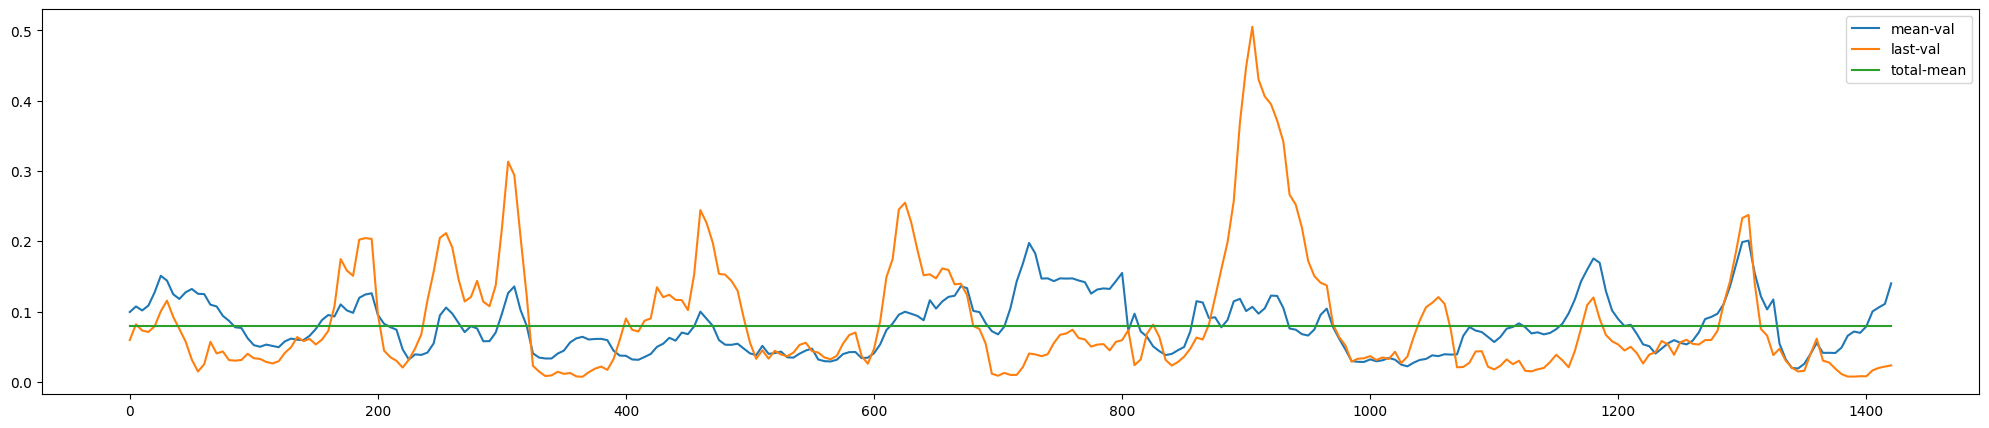

In [18]:
# 5 단위로 mse 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean = []
yr_last = []
for idx in range(0, len(np_pred), 5):
    yr_mean.append(MSE(np_pred[idx, :, :], np_true[idx, :, :]))
    yr_last.append(MSE(np_pred[idx, :, -1], np_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean, label='mean-val')
plt.plot(xr, yr_last, label='last-val')
plt.plot(xr, np.mean(yr_mean) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()

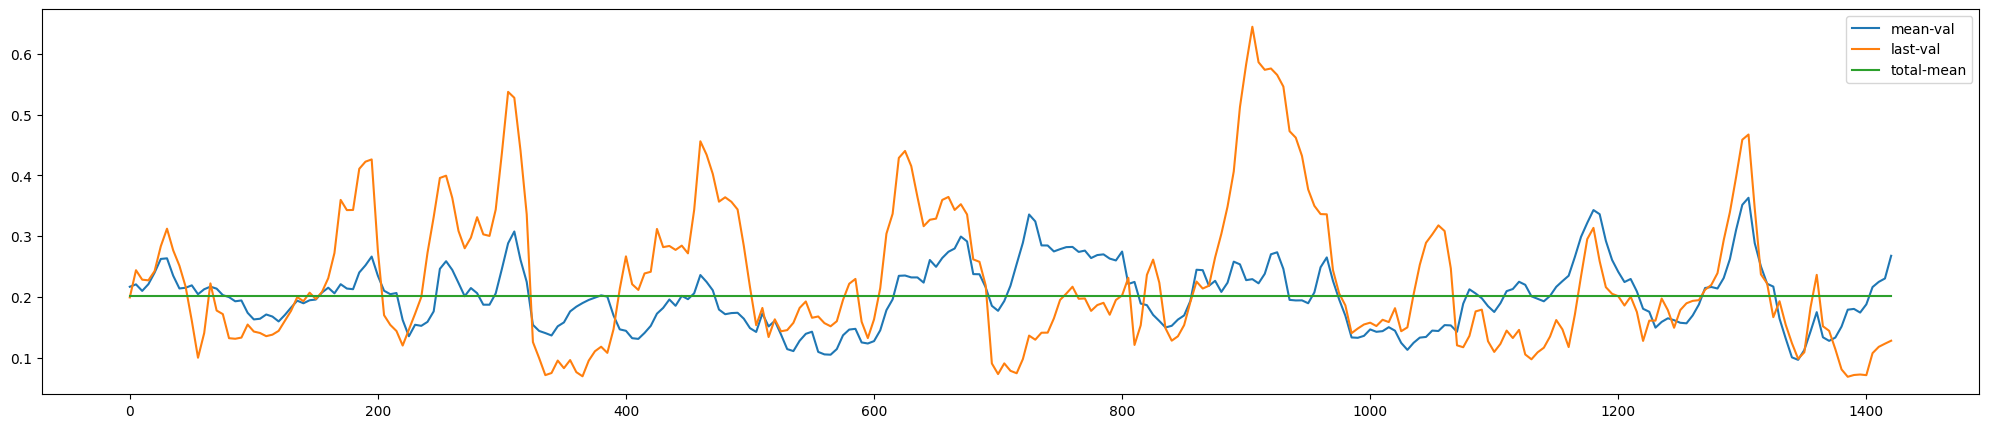

In [19]:
# 5 단위로 mae 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean_mae = []
yr_last_mae = []
for idx in range(0, len(np_pred), 5):
    yr_mean_mae.append(MAE(np_pred[idx, :, :], np_true[idx, :, :]))
    yr_last_mae.append(MAE(np_pred[idx, :, -1], np_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_mae, label='mean-val')
plt.plot(xr, yr_last_mae, label='last-val')
plt.plot(xr, np.mean(yr_mean_mae) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()

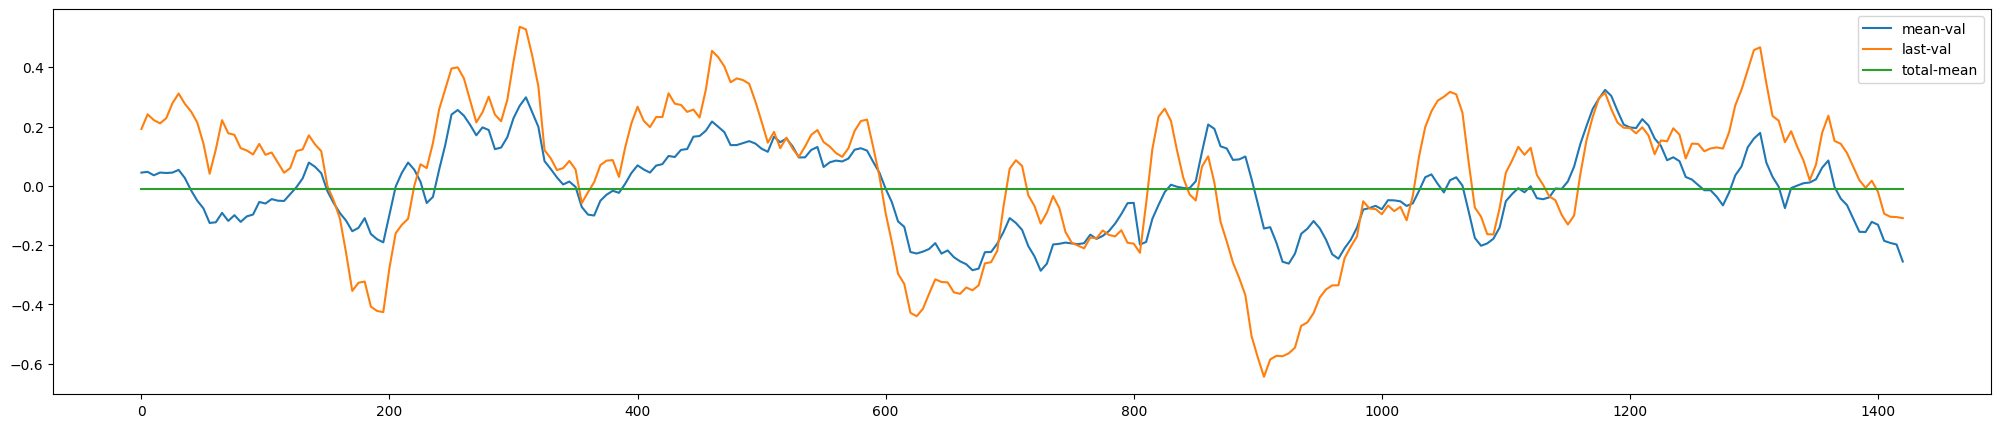

In [20]:
# 5 단위로 mae 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean_smae = []
yr_last_smae = []
for idx in range(0, len(np_pred), 5):
    yr_mean_smae.append(SMAE(np_pred[idx, :, :], np_true[idx, :, :]))
    yr_last_smae.append(SMAE(np_pred[idx, :, -1], np_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_smae, label='mean-val')
plt.plot(xr, yr_last_smae, label='last-val')
plt.plot(xr, np.mean(yr_mean_smae) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()

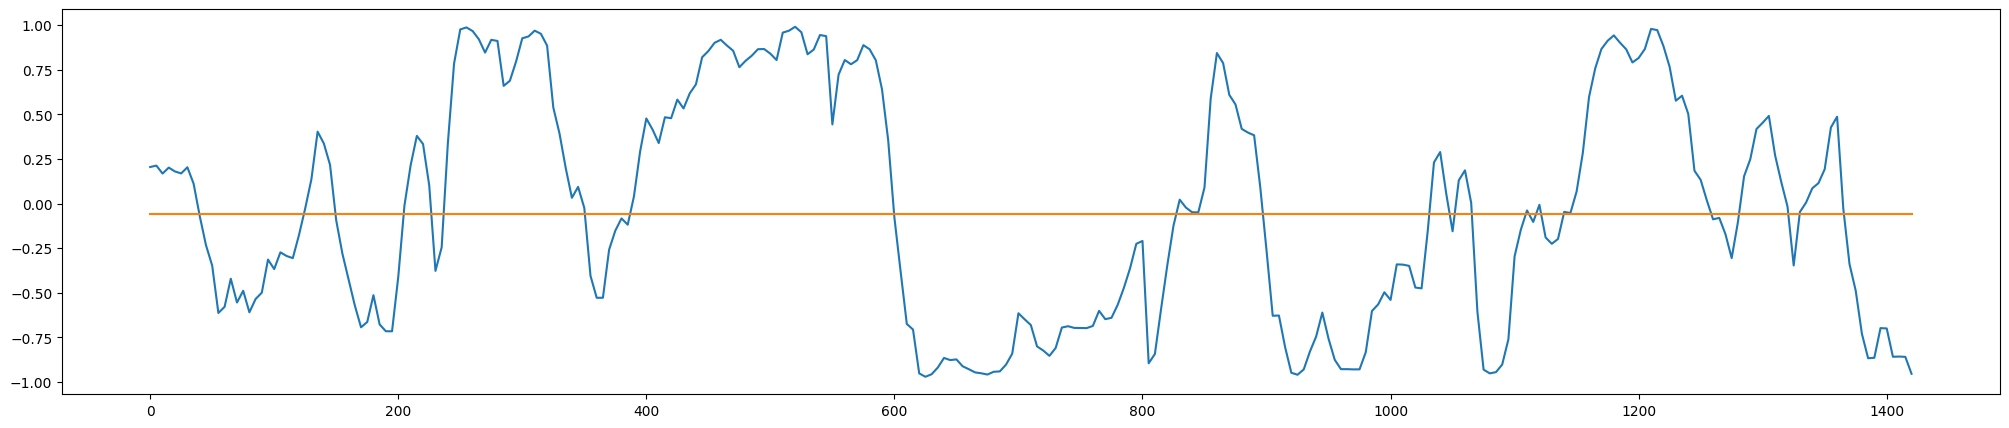

0.5687902


In [23]:
plt.figure(figsize=(25,5))
plt.plot(xr, np.array(yr_mean_smae)/np.array(yr_mean_mae), label='mean-val')
plt.plot(xr, np.mean(yr_mean_smae)/np.mean(yr_mean_mae)*np.ones(len(yr_mean)), label='mean-val')
plt.show()
print(np.mean(np.abs(yr_mean_smae))/np.mean(yr_mean_mae))

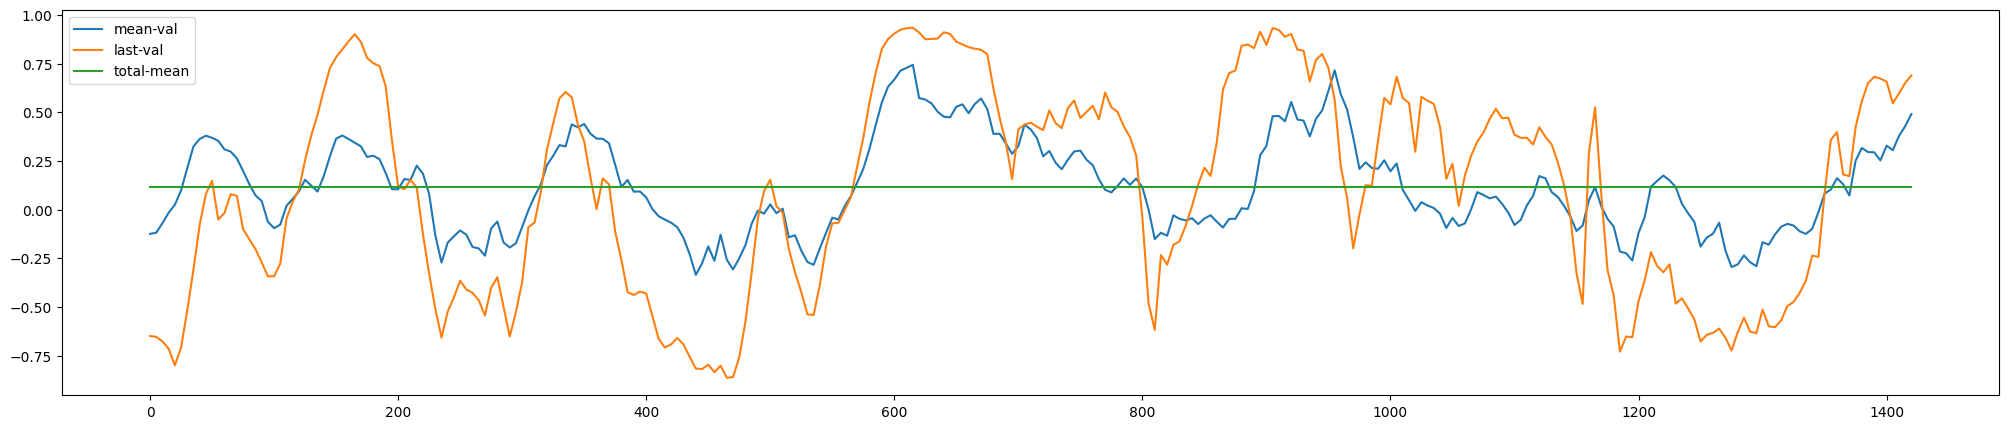

In [25]:
# 5 단위로 coefcorr 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean_corr = []
yr_last_corr = []
for idx in range(0, len(np_pred), 5):
    yr_mean_corr.append(REC_CORR(np_pred[idx, :, :], np_true[idx, :, :]))
    yr_last_corr.append(np.corrcoef(np_pred[idx, :, -1], np_true[idx, :, -1])[0,1])

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_corr, label='mean-val')
plt.plot(xr, yr_last_corr, label='last-val')
plt.plot(xr, np.mean(yr_mean_corr) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()

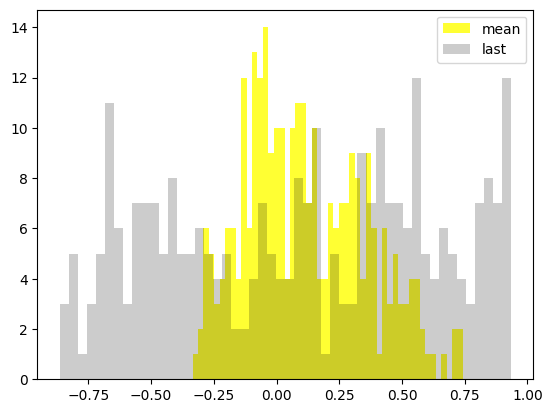

In [27]:
# histogram 분석
plt.hist(yr_mean_corr, color = 'yellow', alpha = 0.8, bins = 50, label='mean')
plt.hist(yr_last_corr, color = 'black', alpha = 0.2, bins = 50, label='last')
plt.legend()
plt.show()

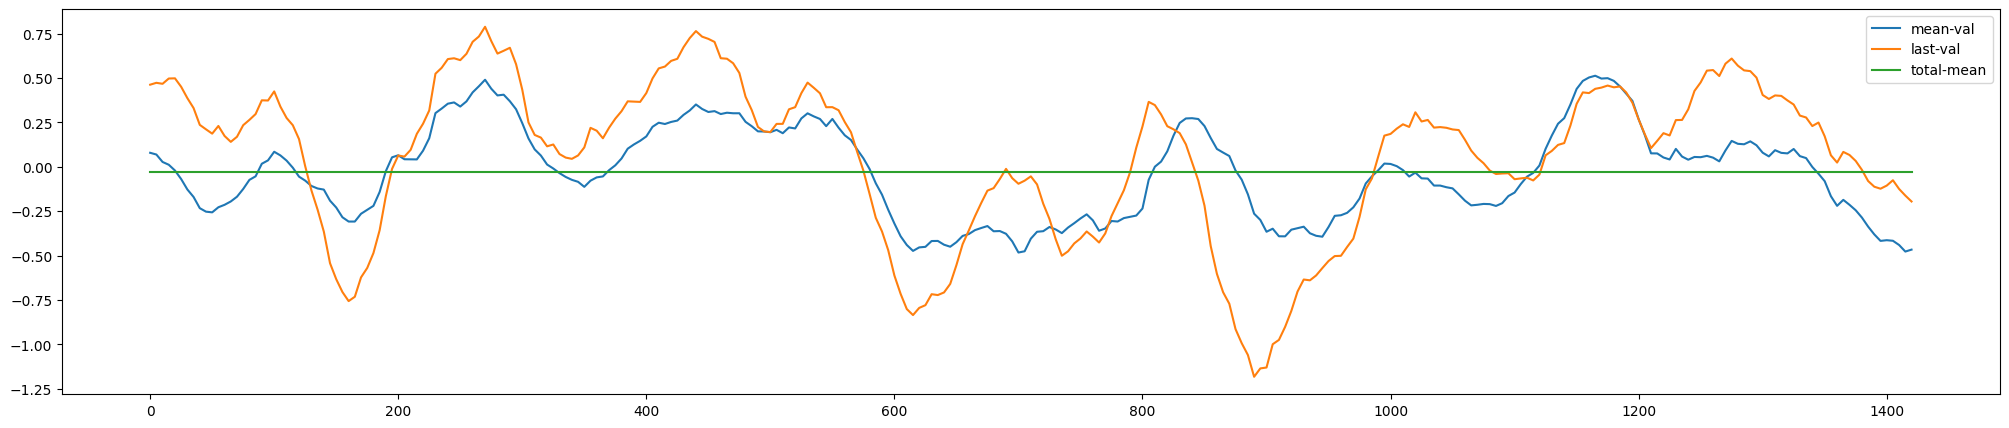

In [29]:
# 5 단위로 coefcorr 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean_slope = []
yr_last_slope = []
for idx in range(0, len(np_pred), 5):
    yr_mean_slope.append(SLOPE_RATIO(np_pred[idx, :, :], np_true[idx, :, :]))
    yr_last_slope.append(96*(get_slope(np.array(range(96)), np_true[idx, :, -1]) - get_slope(np.array(range(96)), np_pred[idx, :, -1])))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_slope, label='mean-val')
plt.plot(xr, yr_last_slope, label='last-val')
plt.plot(xr, np.mean(yr_mean_slope) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()

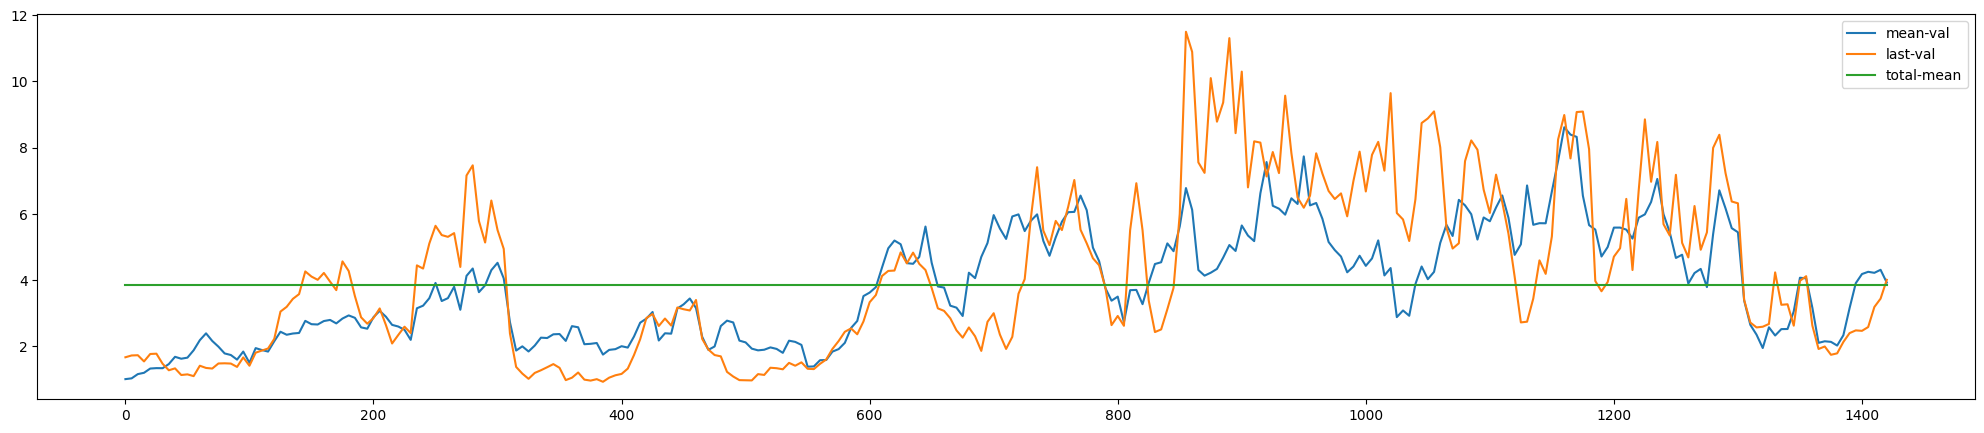

3.8347116
4.176356


In [40]:
# 5 단위로 coefcorr 분

# MSE_DITRIB
xr = list(range(0, len(np_pred), 5))
yr_mean_std = []
yr_last_std = []
for idx in range(0, len(np_pred), 5):
    yr_mean_std.append(STD_RATIO(np_pred[idx, :, :], np_true[idx, :, :], 'median'))
    yr_last_std.append(np.std(np_true[idx, :, -1])/np.std(np_pred[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_std, label='mean-val')
plt.plot(xr, yr_last_std, label='last-val')
plt.plot(xr, np.mean(yr_mean_std) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()
print(np.mean(yr_mean_std))
print(np.mean(yr_last_std))

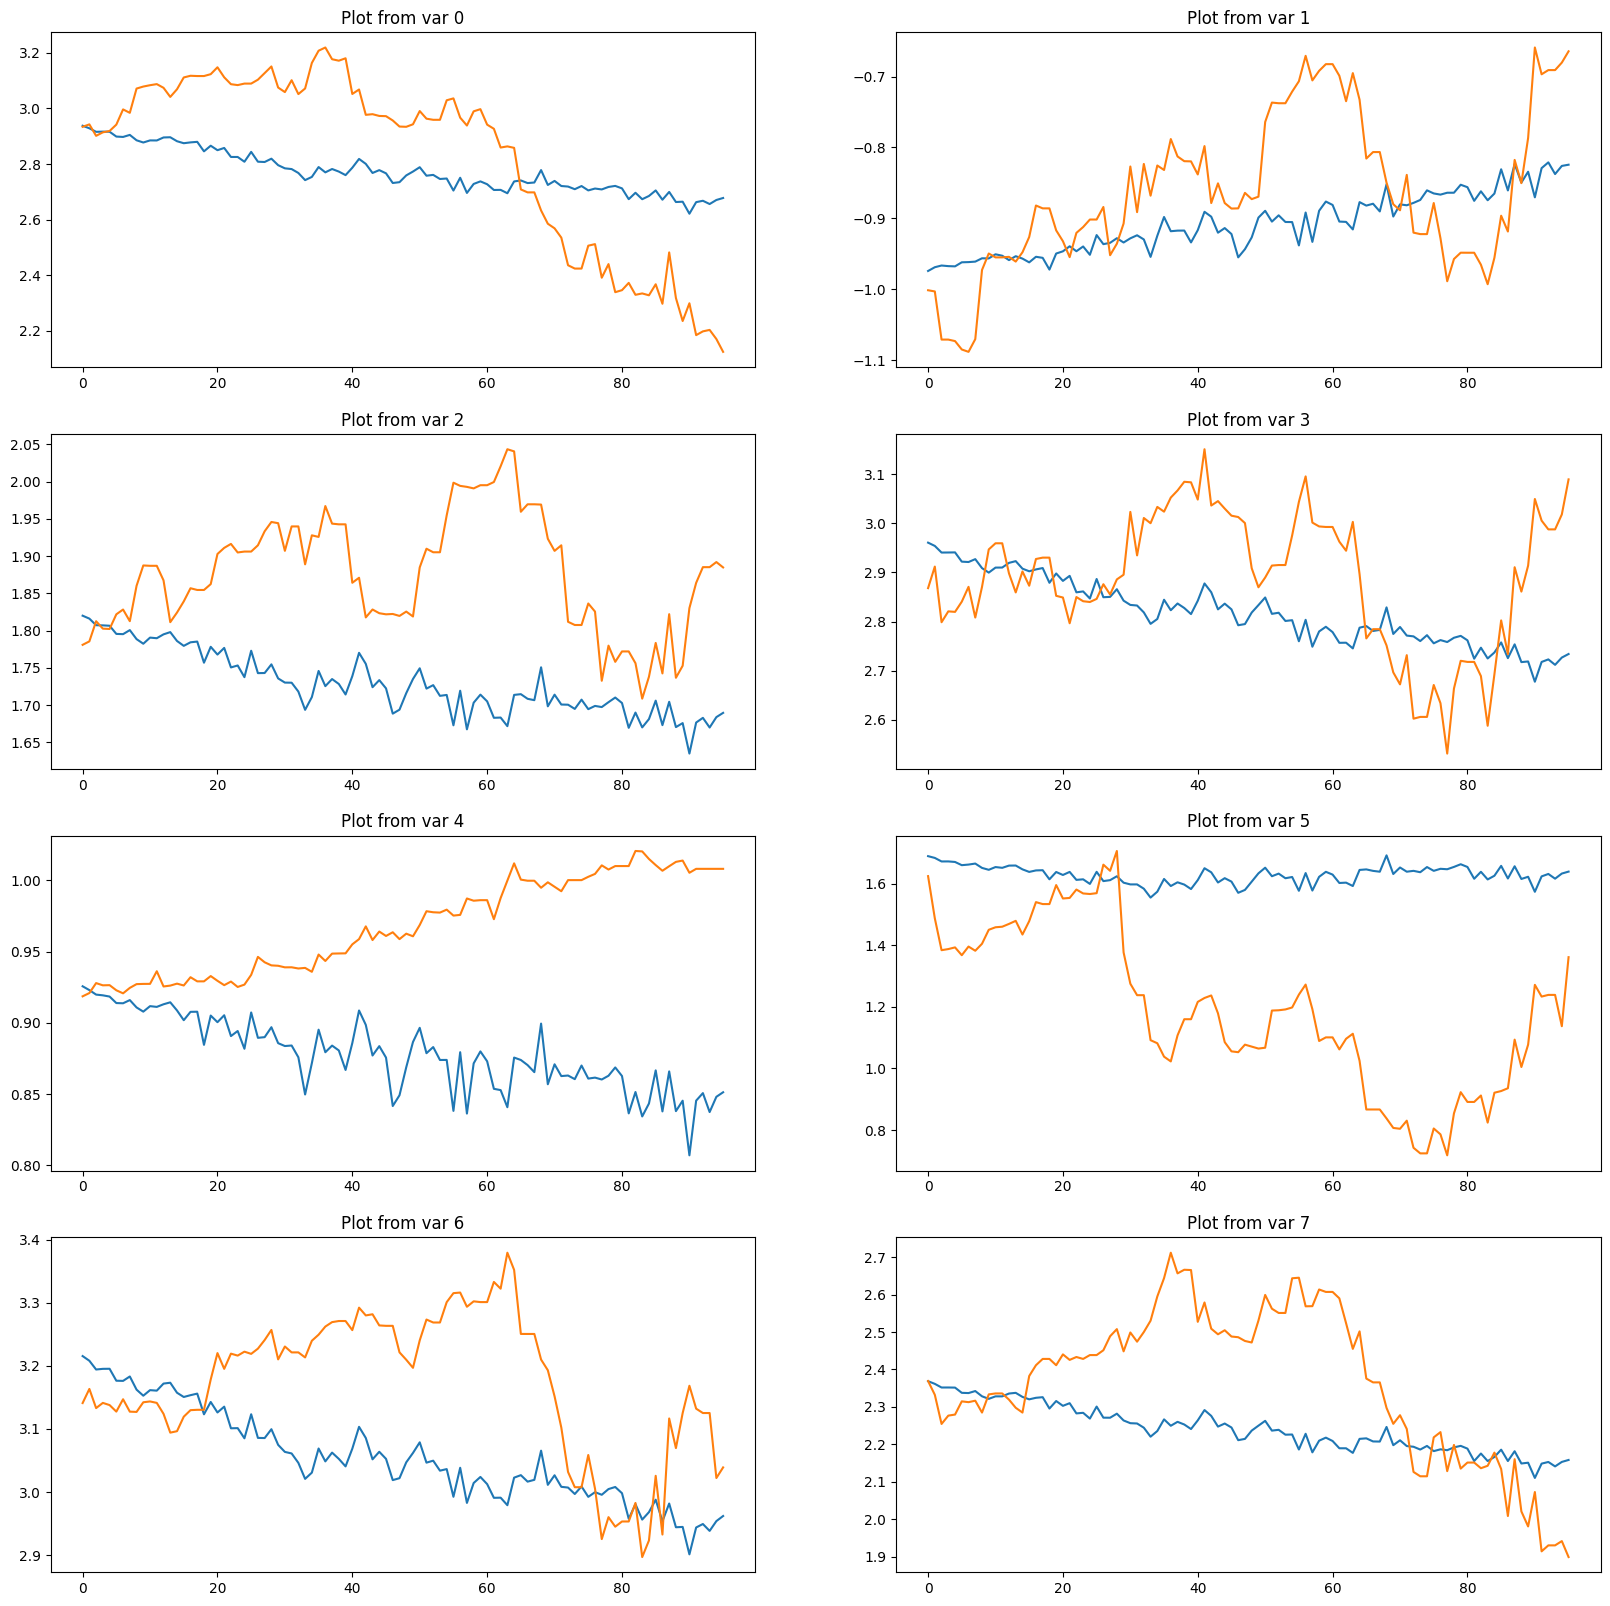

MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.07580254 0.24903542 0.056811657 0.6951145841603099 4.1098785 -0.6706979824030975
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.010946833 0.08416011 0.0433604 0.475129381350573 2.5667307 0.05854415138066623
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.029560024 0.14779887 0.14616664 -0.08111506031475821 1.8114842 0.10527011599155206
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.025136309 0.12787421 0.067635246 0.11834724997479577 1.9923997 0.11596402754553359
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.011125143 0.08975804 0.08956782 -0.7955659593114662 1.2981924 0.18719207080110414
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.26197478 0.44529614 -0.44184017 0.03599226056269795 9.287249 -0.6510353086309076
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.028732464 0.13921499 0.11563736 0.15446597590424177 1.4911551 0.12184270676619581
MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO
0.049193095 0.17718536 

In [41]:
idx = 130
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = np_pred[idx, :, val]
        y2 = np_true[idx, :, val]
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용

plt.show()
for c in range(8):
    print("MSE, MAE, SMAE, REC_CORR, STD_RATIO, SLOPE_RATIO")
    print(MSE(np_pred[idx,:,c], np_true[idx, :, c]), 
          MAE(np_pred[idx,:,c], np_true[idx, :, c]), 
          SMAE(np_pred[idx,:,c], np_true[idx, :, c]), 
          np.corrcoef(np_pred[idx,:,c], np_true[idx, :, c])[0,1], 
        np.std(np_true[idx,:,c]) / np.std(np_pred[idx, :, c]),
     96*(get_slope(tv, np_true[idx,:,c]) - get_slope(tv, np_pred[idx, :, c])))

In [42]:
# 자체 변동폭이 작은지 검증
idx_series = [33, 130, 220, 400, 480, 570, 650, 730]
# idx 오차
for idx in idx_series:
    print(f"difference {idx} :", MSE(np_pred[idx], np_true[idx]))
    print(f"difference_last {idx} :", MSE(np_pred[idx, :, -1], np_true[idx, :, -1]))

# 자체 오차
for i, idx1 in enumerate(idx_series):
    for idx2 in idx_series[i+1:]:
        print(f"difference between {idx1} & {idx2} :", MSE(np_pred[idx1], np_pred[idx2]))
        print(f"difference_last betwen {idx1} & {idx2} :", MSE(np_pred[idx1, : ,-1], np_pred[idx2, :, -1]))


difference 33 : 0.12642525
difference_last 33 : 0.095078655
difference 130 : 0.061558902
difference_last 130 : 0.049193095
difference 220 : 0.046190064
difference_last 220 : 0.0203558
difference 400 : 0.03706106
difference_last 400 : 0.090126395
difference 480 : 0.052859873
difference_last 480 : 0.15249026
difference 570 : 0.031497803
difference_last 570 : 0.037123498
difference 650 : 0.10425466
difference_last 650 : 0.14718156
difference 730 : 0.18258804
difference_last 730 : 0.03910649
difference between 33 & 130 : 0.25587967
difference_last betwen 33 & 130 : 0.013324822
difference between 33 & 220 : 0.6129467
difference_last betwen 33 & 220 : 0.033497874
difference between 33 & 400 : 0.86030626
difference_last betwen 33 & 400 : 0.002925413
difference between 33 & 480 : 0.9299336
difference_last betwen 33 & 480 : 0.023462215
difference between 33 & 570 : 0.8448017
difference_last betwen 33 & 570 : 0.1703585
difference between 33 & 650 : 0.85414714
difference_last betwen 33 & 650 : 0.

In [43]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))


In [50]:
def normalizing_array(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr-mean)/std

In [51]:
for i, idx1 in enumerate(idx_series):
    for idx2 in idx_series[i+1:]:
        print(f"difference between {idx1} & {idx2} :", MSE(normalizing_array(np_pred[idx1]), normalizing_array(np_pred[idx2])))
        print(f"difference_last betwen {idx1} & {idx2} :", MSE(normalizing_array(np_pred[idx1, : ,-1]), normalizing_array(np_pred[idx2, :, -1])))

difference between 33 & 130 : 0.12123308
difference_last betwen 33 & 130 : 0.003330117
difference between 33 & 220 : 0.26836228
difference_last betwen 33 & 220 : 0.023799641
difference between 33 & 400 : 0.5064107
difference_last betwen 33 & 400 : 0.0136704445
difference between 33 & 480 : 0.584297
difference_last betwen 33 & 480 : 0.0071985
difference between 33 & 570 : 0.56616545
difference_last betwen 33 & 570 : 0.0017957381
difference between 33 & 650 : 0.5594749
difference_last betwen 33 & 650 : 0.00425183
difference between 33 & 730 : 0.6534833
difference_last betwen 33 & 730 : 0.31357616
difference between 130 & 220 : 0.043730464
difference_last betwen 130 & 220 : 0.024455681
difference between 130 & 400 : 0.21280825
difference_last betwen 130 & 400 : 0.021256842
difference between 130 & 480 : 0.27836677
difference_last betwen 130 & 480 : 0.0056700907
difference between 130 & 570 : 0.25802657
difference_last betwen 130 & 570 : 0.0024387778
difference between 130 & 650 : 0.247154

In [74]:
for i, idx1 in enumerate(idx_series):
    for idx2 in idx_series[i+1:]:
        print(f"difference between {idx1} & {idx2} :", np.median([MSE(normalizing_array(np_true[idx1,:,v]), normalizing_array(np_true[idx2,:,v])) for v in range(8)]))
        print(f"difference_last betwen {idx1} & {idx2} :", MSE(normalizing_array(np_true[idx1, : ,-1]), normalizing_array(np_true[idx2, :, -1])))

difference between 33 & 130 : 1.6877522
difference_last betwen 33 & 130 : 1.930191
difference between 33 & 220 : 1.5613317
difference_last betwen 33 & 220 : 2.1269898
difference between 33 & 400 : 2.589404
difference_last betwen 33 & 400 : 2.2921698
difference between 33 & 480 : 2.4579864
difference_last betwen 33 & 480 : 0.9452236
difference between 33 & 570 : 1.5235801
difference_last betwen 33 & 570 : 1.9287599
difference between 33 & 650 : 0.9525629
difference_last betwen 33 & 650 : 3.0455983
difference between 33 & 730 : 1.0080899
difference_last betwen 33 & 730 : 2.1638012
difference between 130 & 220 : 1.9226651
difference_last betwen 130 & 220 : 2.2609272
difference between 130 & 400 : 2.8146038
difference_last betwen 130 & 400 : 3.2855837
difference between 130 & 480 : 2.4025502
difference_last betwen 130 & 480 : 1.6900173
difference between 130 & 570 : 1.1744249
difference_last betwen 130 & 570 : 0.28549826
difference between 130 & 650 : 1.6041377
difference_last betwen 130 &

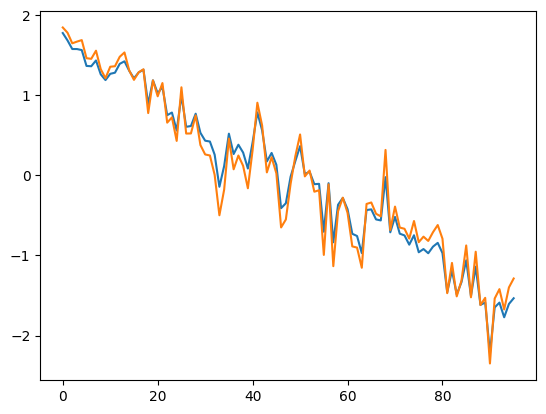

In [63]:
plt.plot(range(96), normalizing_array(np_pred[560, :, 0]))
plt.plot(range(96), normalizing_array(np_pred[650, :, 0]))
plt.show()

0.12526654
0.25003436
0.34543085
0.017215436
0.0033275306
0.983391
0.025521563
0.015697917


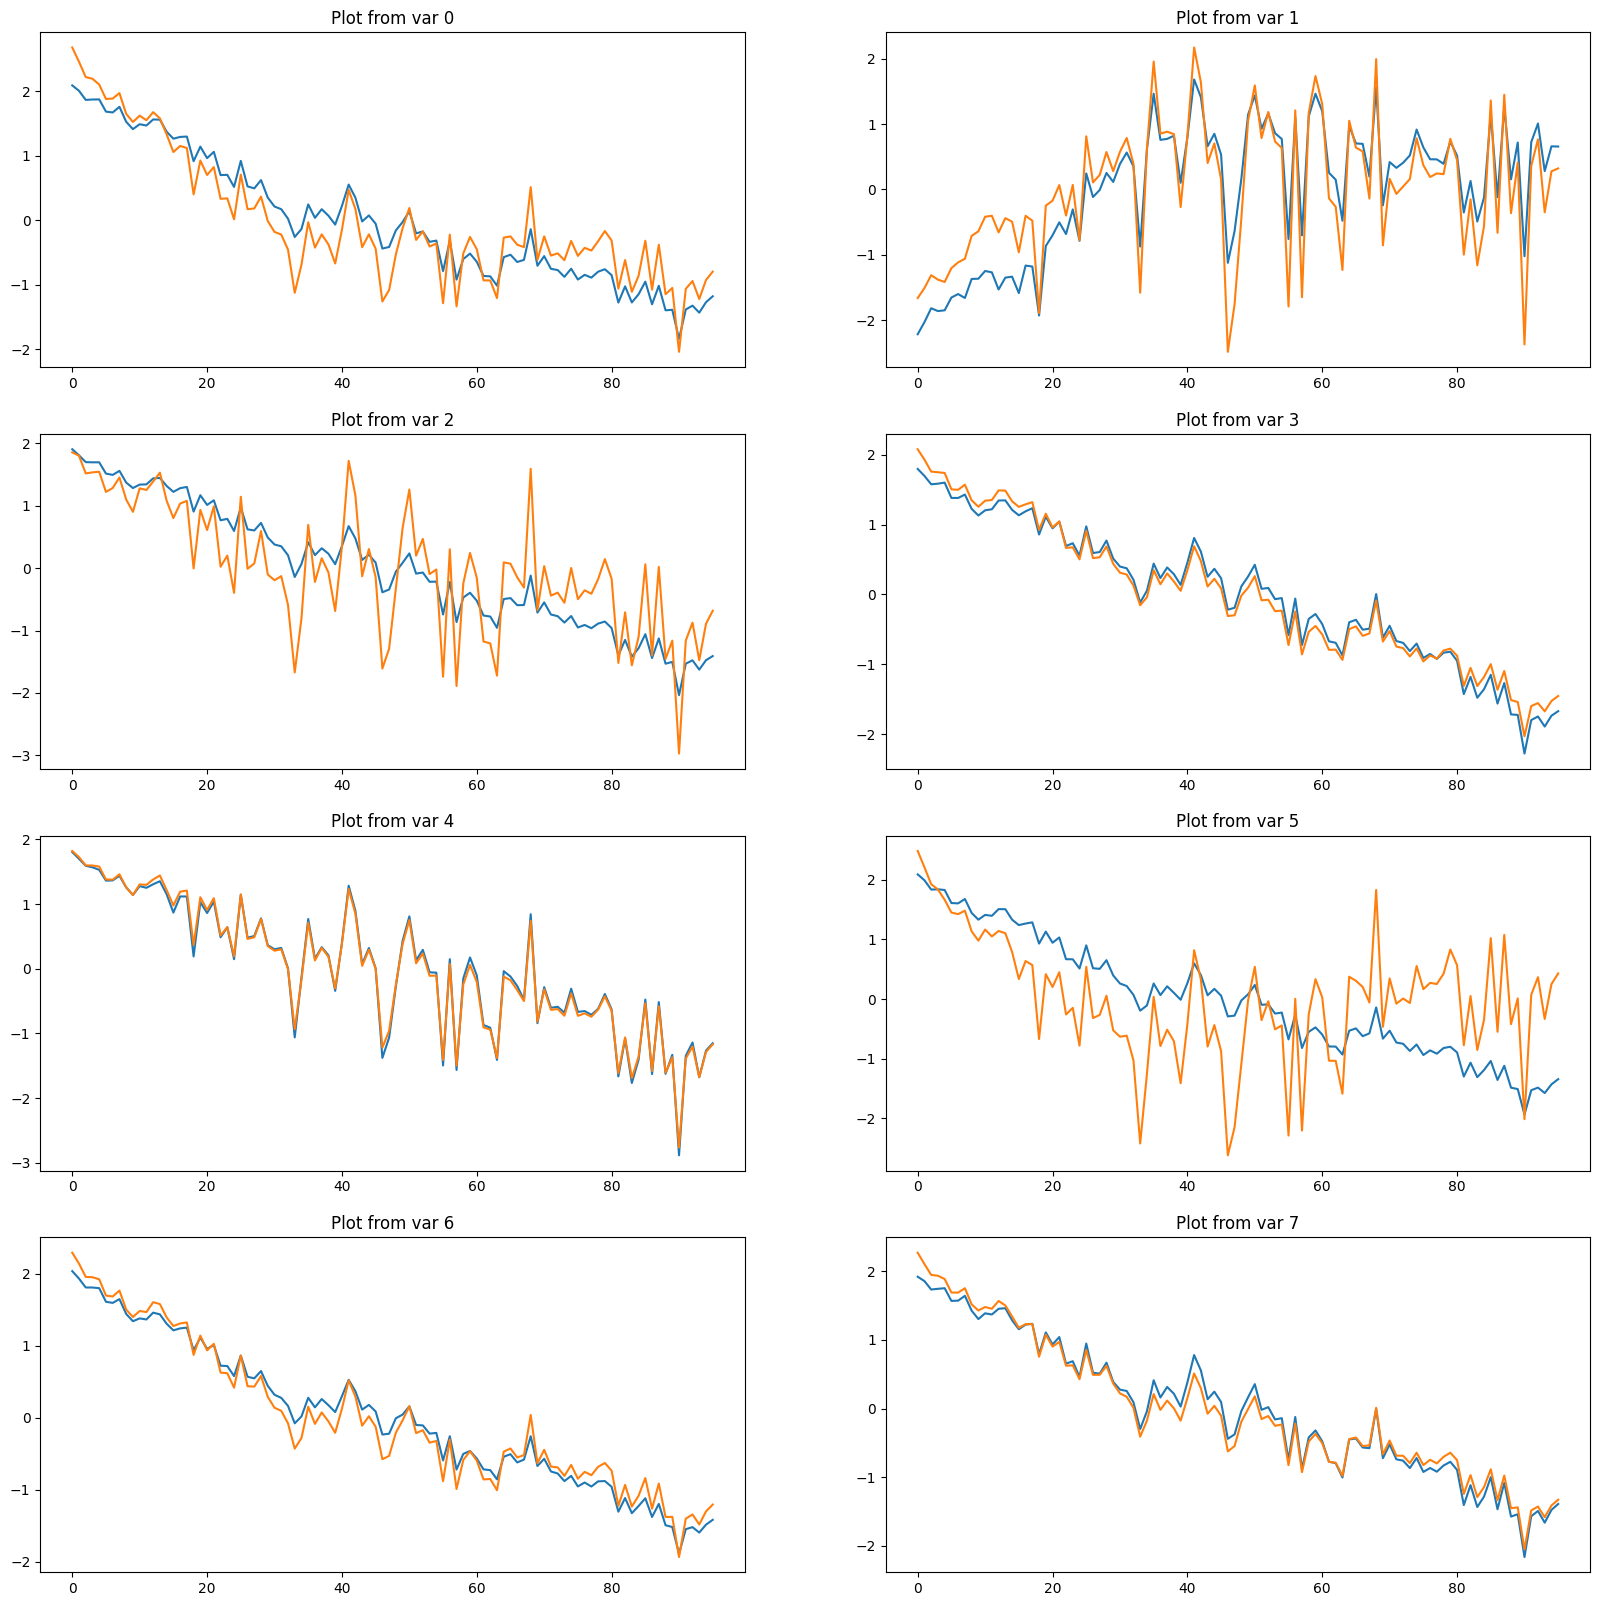

In [71]:
idx1 = 0
idx2 = 440
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = normalizing_array(np_pred[idx1, :, val])
        y2 = normalizing_array(np_pred[idx2, :, val])
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용
        print(MSE(y1, y2))

plt.show()

0.8167197
2.1279657
2.0044904
0.77830213
3.1835022
2.3605726
3.1625035
0.73143643


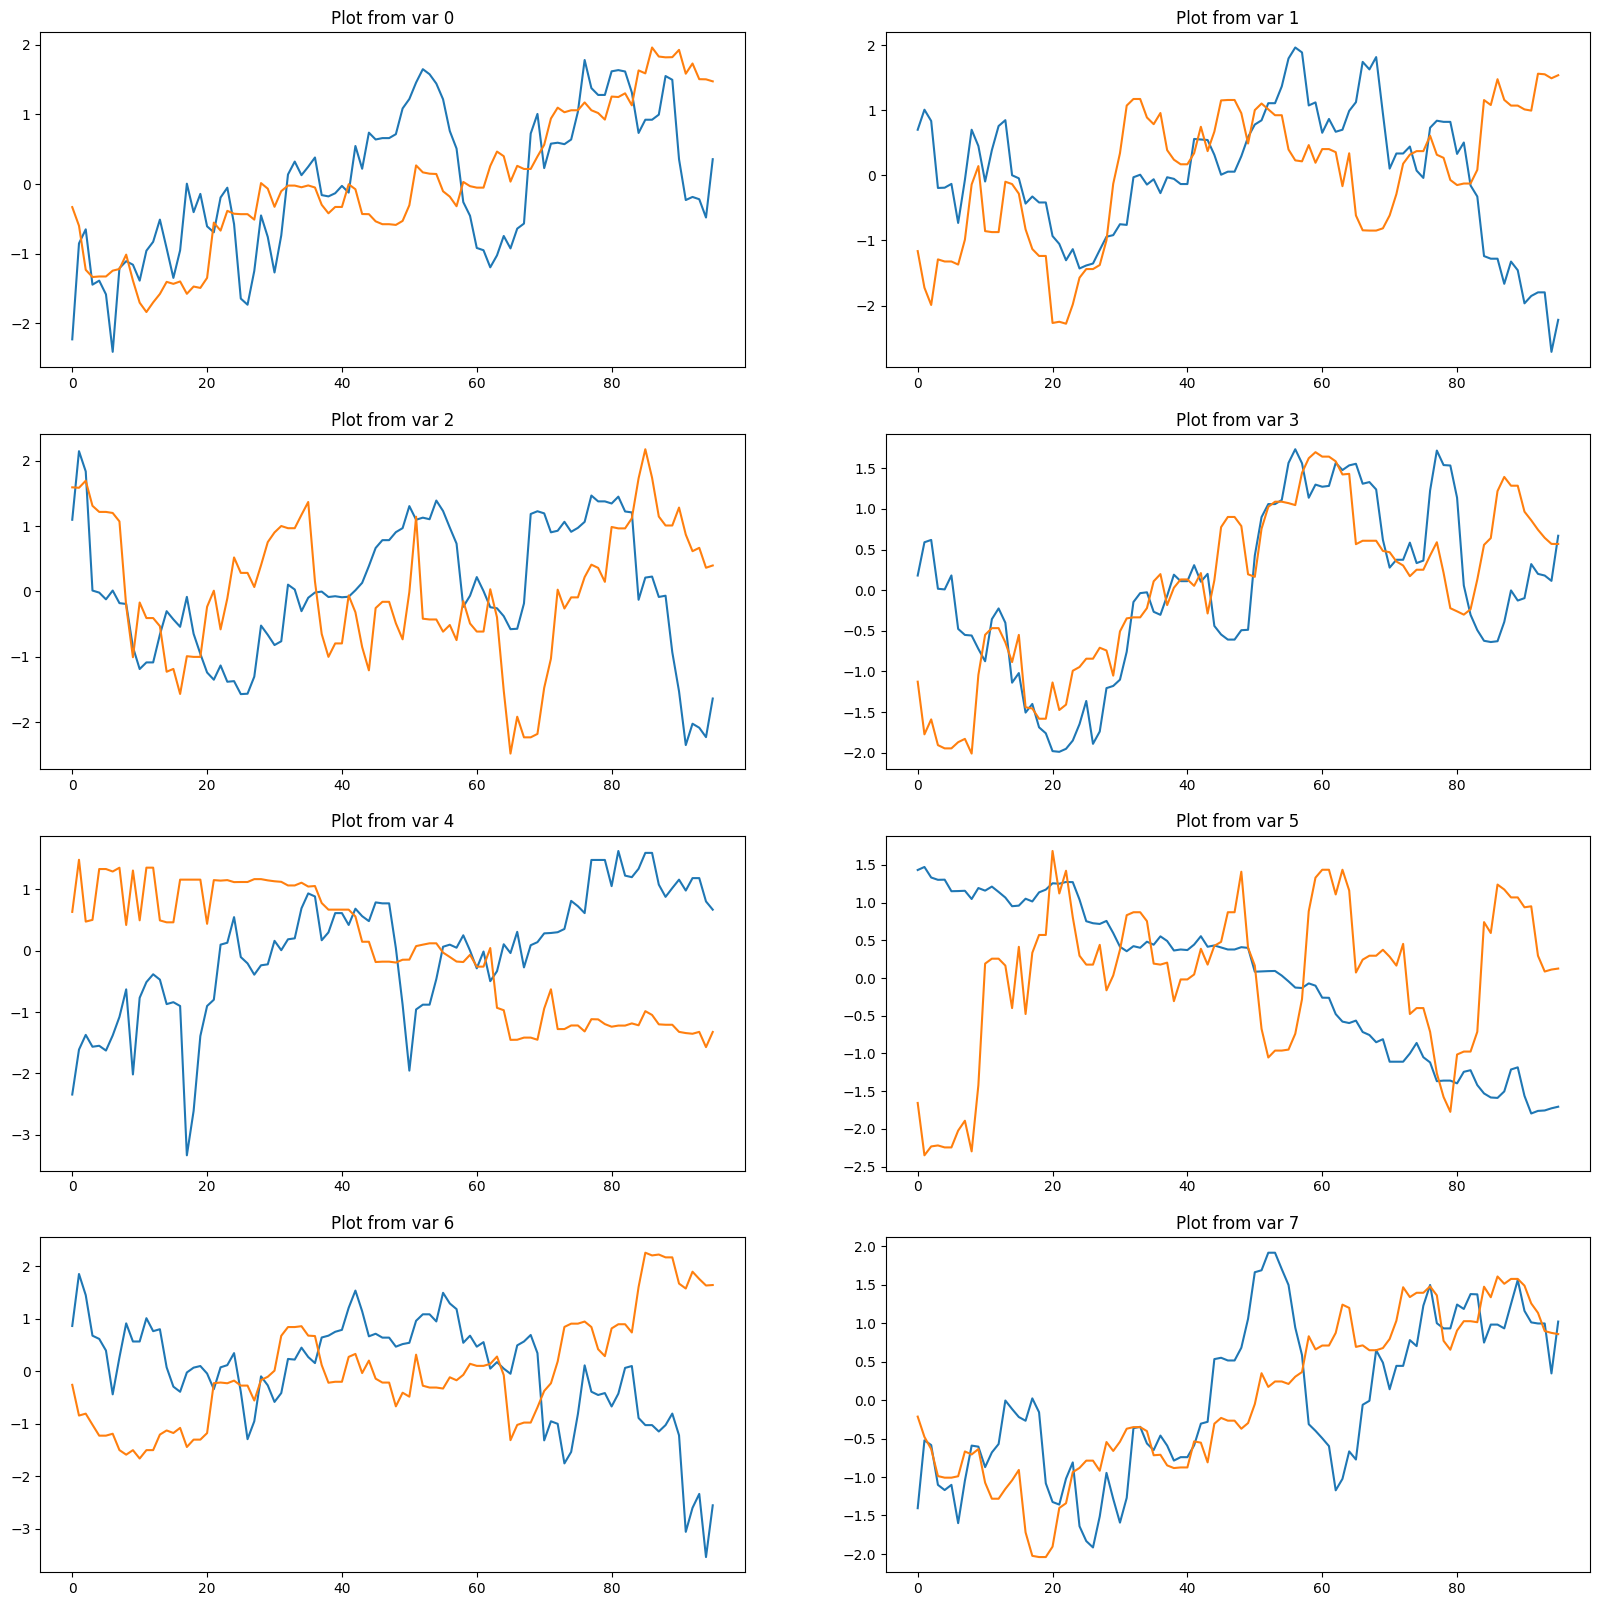

In [72]:
idx1 = 0
idx2 = 440
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = normalizing_array(np_true[idx1, :, val])
        y2 = normalizing_array(np_true[idx2, :, val])
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용
        print(MSE(y1, y2))

plt.show()

In [75]:
# iTransformer도 동일한 현상이 있으려나?
itransformer_result = 'long_term_forecast_iTransformer_Exchange_96_96_iTransformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1726804756)'

np_pred3 = np.load(result_path + itransformer_result + '/' + obj_list[0]) 
np_true3 = np.load(result_path + itransformer_result + '/' + obj_list[1]) 

1.9747887
3.780014
2.5067053
3.606264
3.5183742
2.4098656
3.3182104
1.1122717


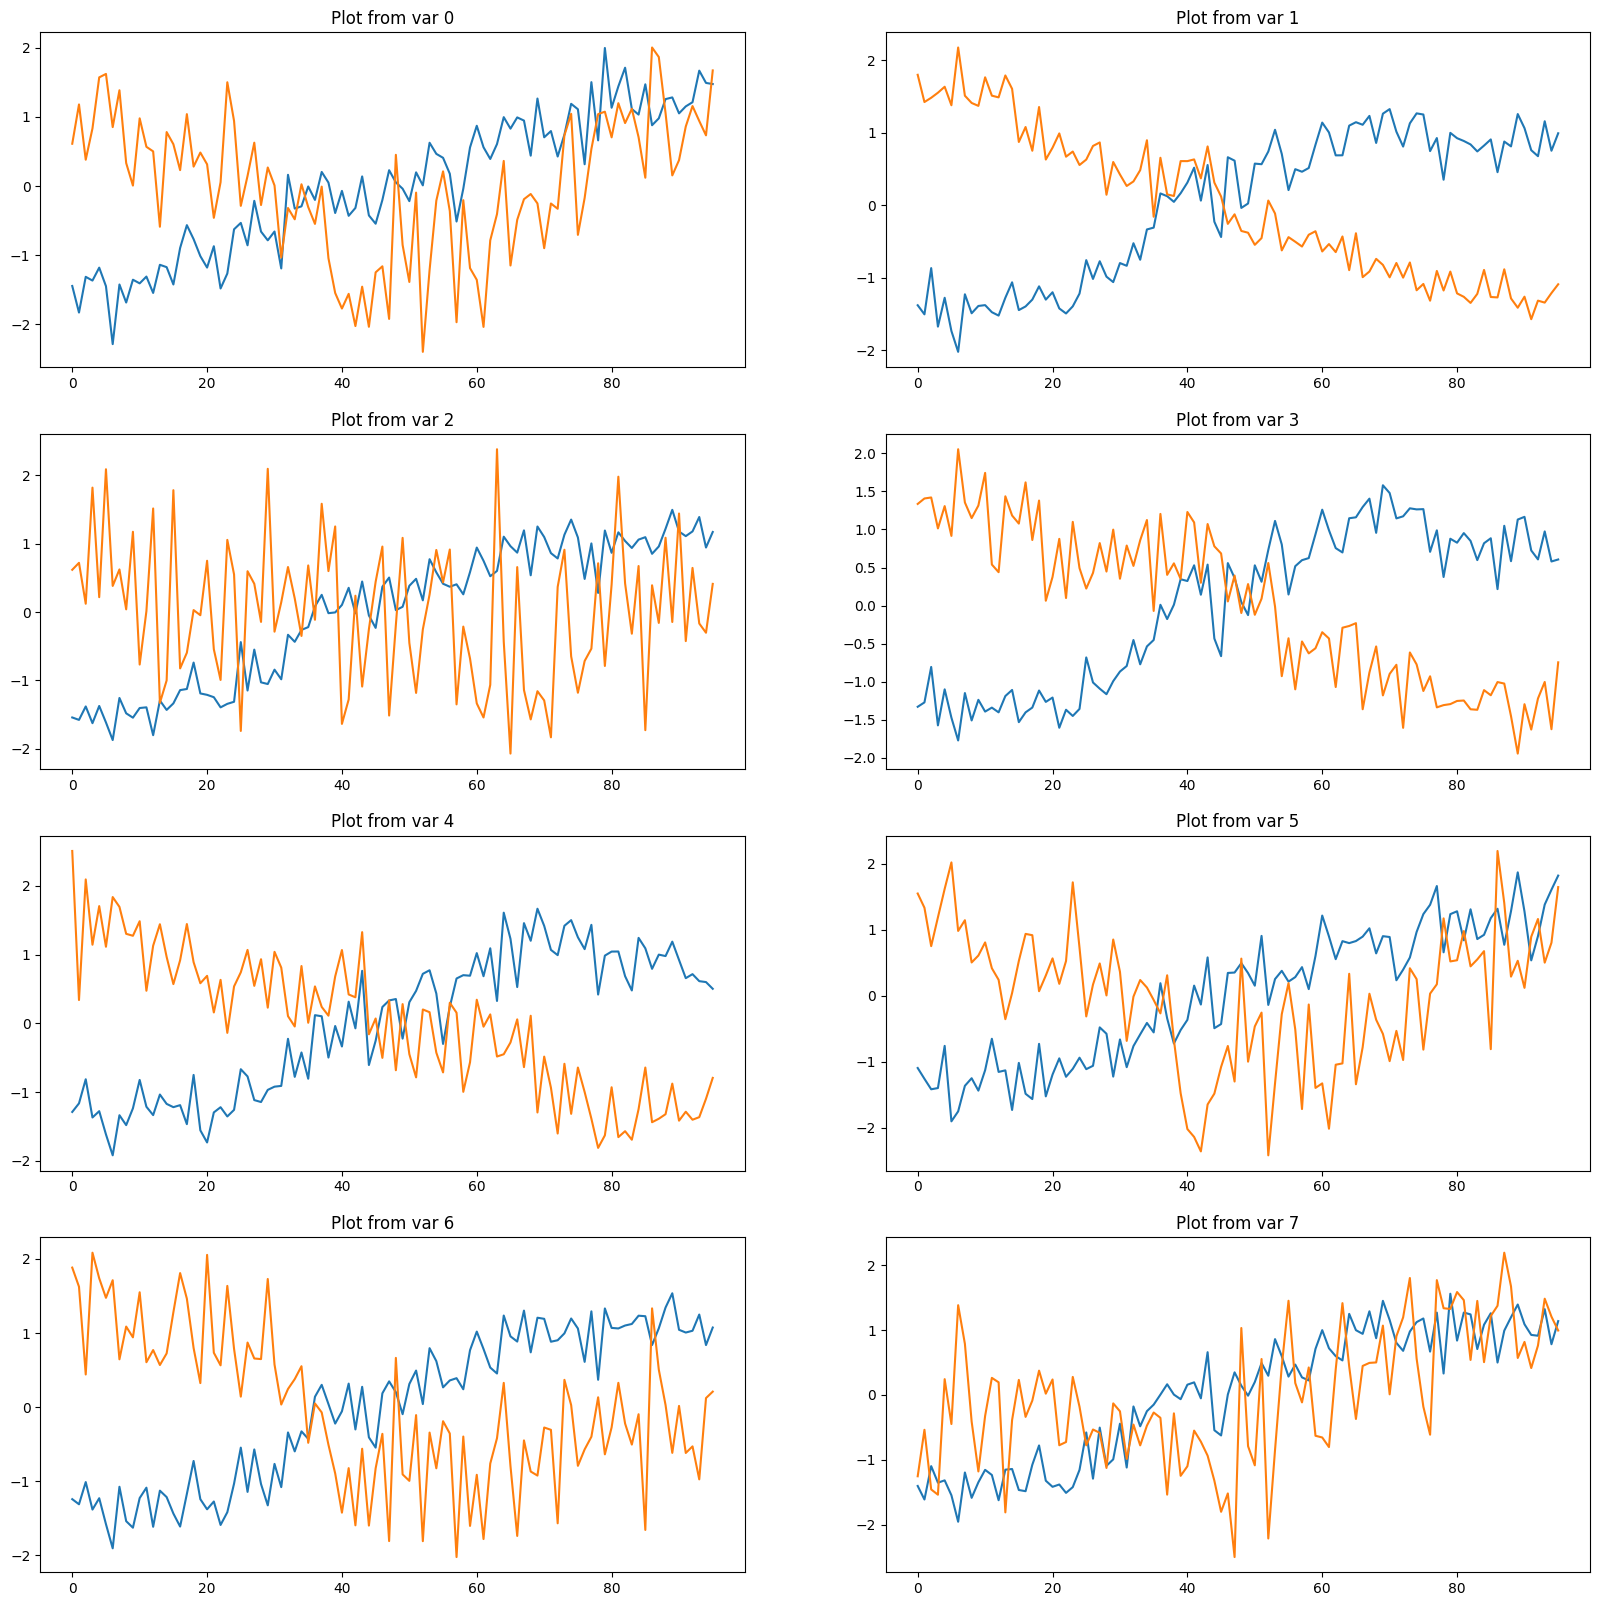

In [76]:
idx1 = 0
idx2 = 440
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = normalizing_array(np_pred3[idx1, :, val])
        y2 = normalizing_array(np_pred3[idx2, :, val])
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용
        print(MSE(y1, y2))

plt.show()

0.8167197
2.1279657
2.0044904
0.77830213
3.1835022
2.3605726
3.1625035
0.73143643


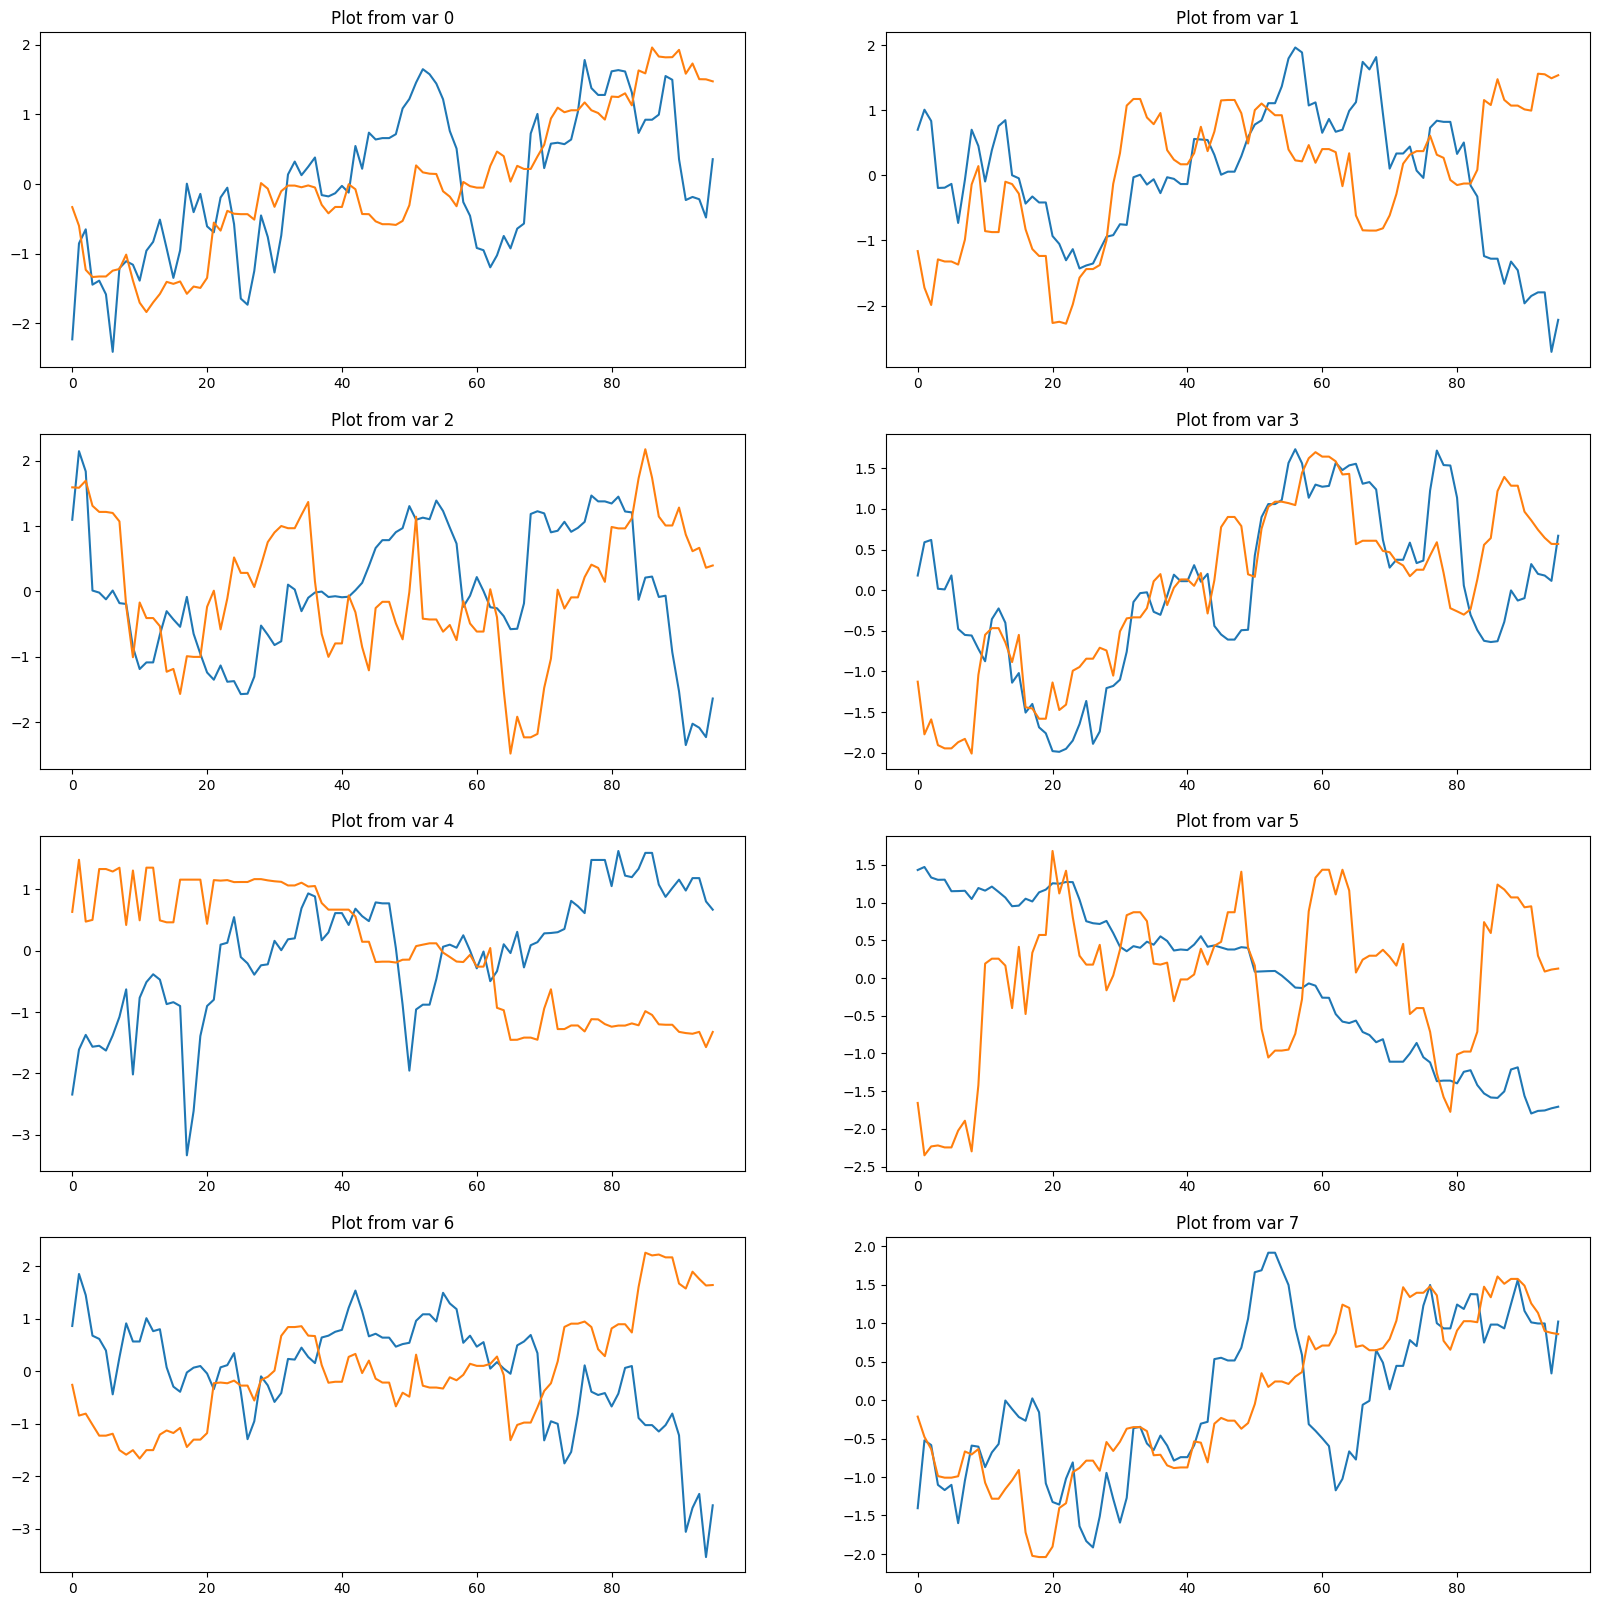

In [77]:
idx1 = 0
idx2 = 440
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = normalizing_array(np_true3[idx1, :, val])
        y2 = normalizing_array(np_true3[idx2, :, val])
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용
        print(MSE(y1, y2))

plt.show()

0.7311962
1.6462511
1.5076456
0.6201749
0.7904665
3.7936592
2.7198544
0.65011394


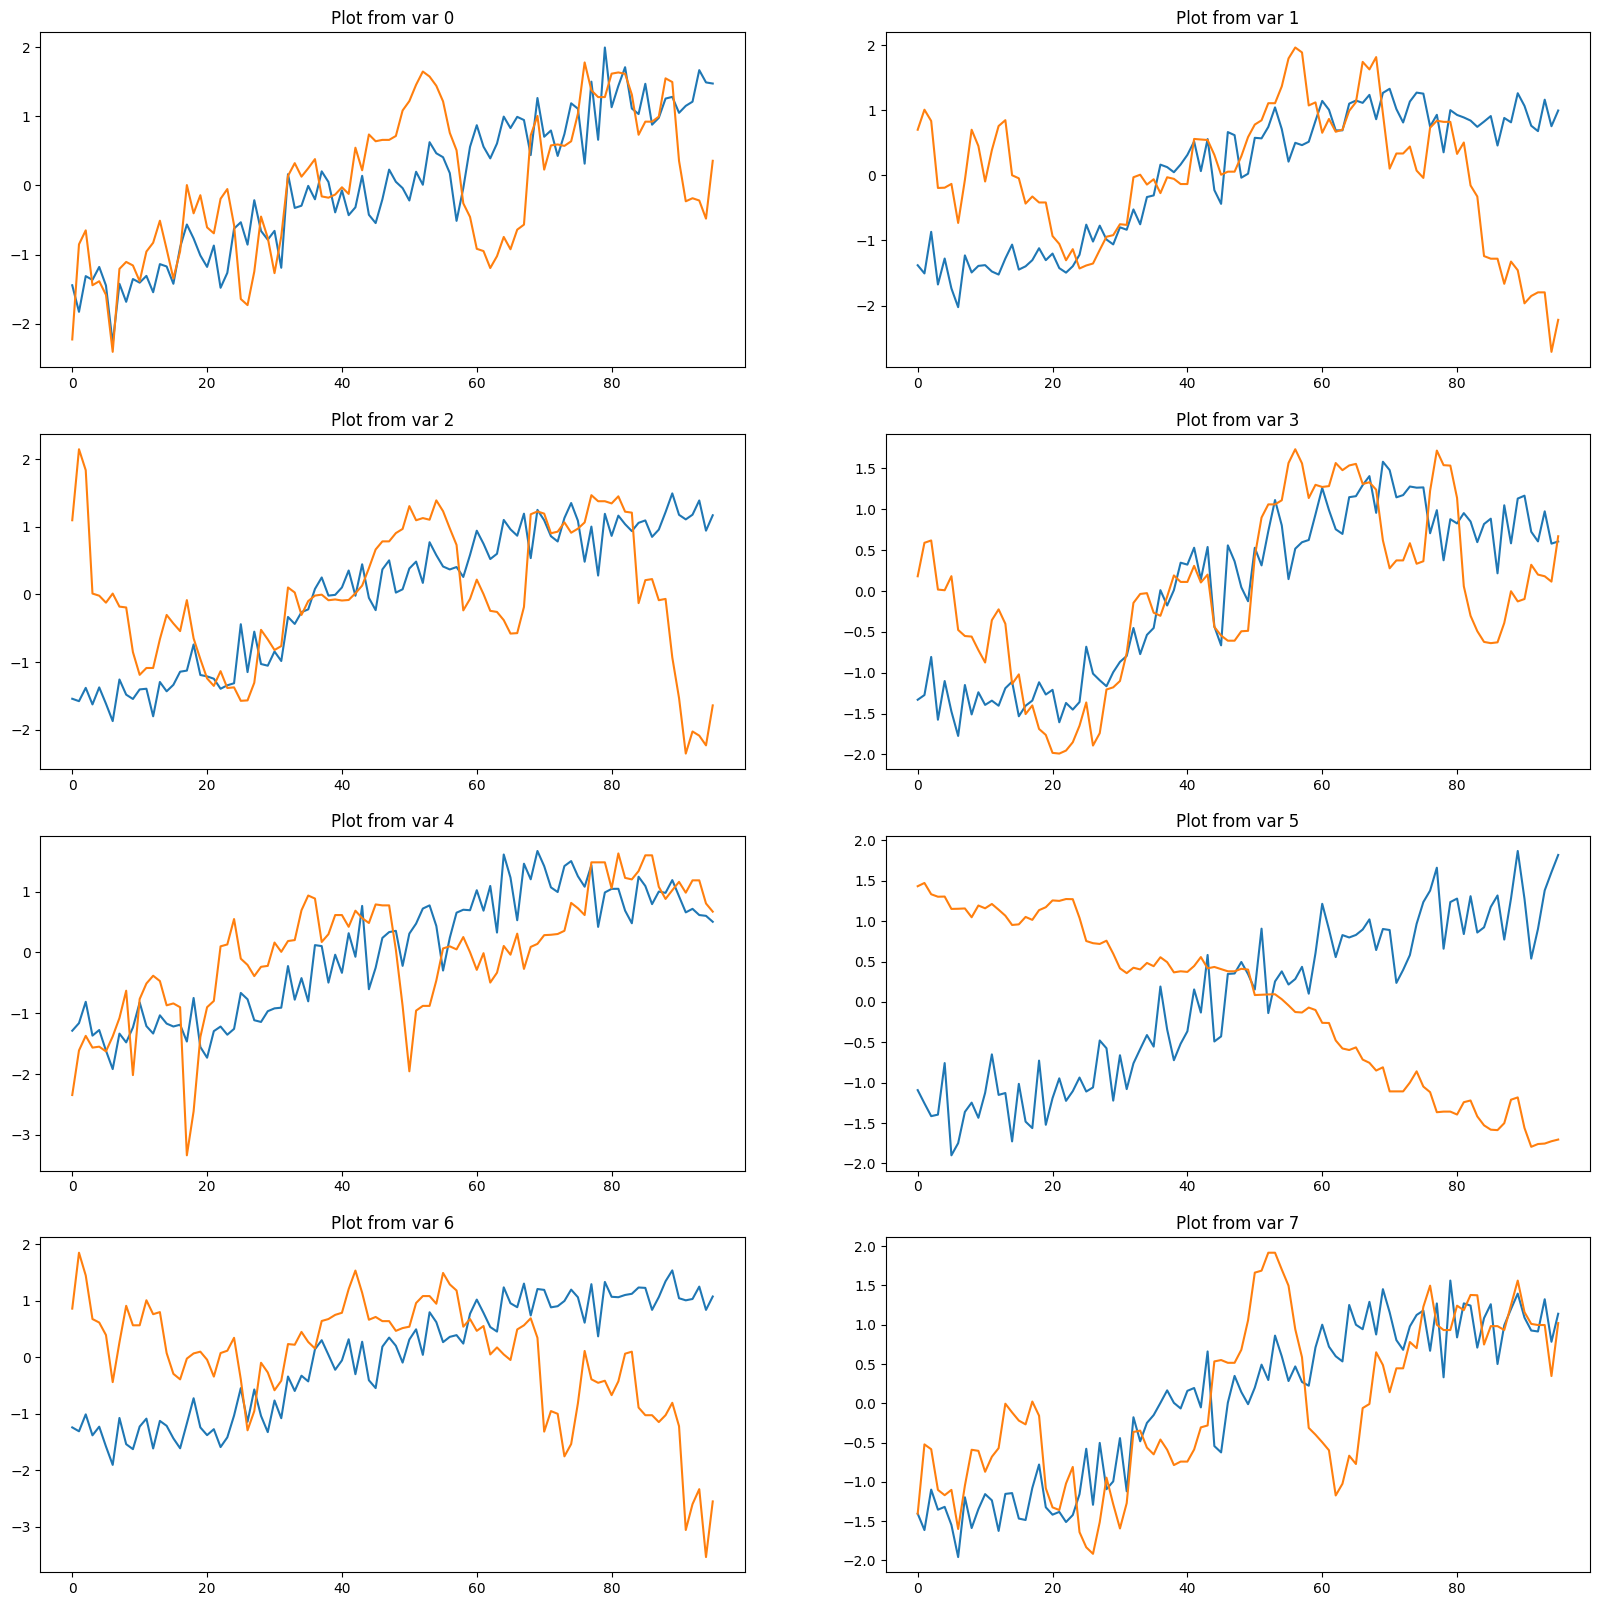

In [78]:
idx1 = 0
# idx2 = 440
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
for i in range(4):
    for j in range(2):
        val = i*2 + j
        y1 = normalizing_array(np_pred3[idx1, :, val])
        y2 = normalizing_array(np_true3[idx1, :, val])
        ax = axs[i, j]
        ax.plot(tv, y1, label='pred')  # 예제: 서로 다른 사인 곡선 플롯
        ax.plot(tv, y2, label='true')
        ax.set_title(f'Plot from var {(i*2 + j)}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용
        print(MSE(y1, y2))

plt.show()